# importing Required Libraries

In [49]:
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import skillsnetwork

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#import lime
#from lime import lime_tabular
#import shap



# Function

In [50]:
# to plot easly data taken from x value , y value
def plotter( x,y , title):
    plt.plot(x,y)
    plt.x_label('X')
    plt.y_label('Y')
    plt.title(title)
    plt.show()

# Model Preparation

The international football results from 1872 - 2022
https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017

Games for Training

In [51]:
# import the dataset
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0TUZEN/Training_games.csv')


Saved as 'Training_games.csv'


In [52]:
#  show the data
game_all = pd.read_csv('Training_games.csv')
game_all.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2022-01-02,Gabon,Burkina Faso,0.0,3.0,Friendly,Dubai,United Arab Emirates,True
1,2022-01-02,Sudan,Zimbabwe,0.0,0.0,Friendly,Yaoundé,Cameroon,True
2,2022-01-03,Rwanda,Guinea,3.0,0.0,Friendly,Kigali,Rwanda,False
3,2022-01-04,Mauritania,Gabon,1.0,1.0,Friendly,Dubai,United Arab Emirates,True
4,2022-01-05,Algeria,Ghana,3.0,0.0,Friendly,Al Rayyan,Qatar,True


In [53]:
# list of the teams  in the world cup Qatar 2022
teams = ['Senegal','Qatar','Netherlands','Ecuador','Iran','England','United States','Wales','Argentina','Saudi Arabia','Mexico','Poland','Denmark','Tunisia','France','Australia','Germany','Japan','Spain','Costa Rica','Morocco','Croatia','Belgium','Canada','Switzerland','Cameroon','Brazil','Serbia','Uruguay','Korea Republic','Portugal','Ghana']

In [54]:
game_all = game_all.replace('South Korea','Korea Republic')

here we will pick just the games played among the teams wich appear in the team list ( teams who went to Qatar 2022)

In [55]:
games = game_all.drop(game_all[( ~game_all['home_team'].isin(teams)) | (~game_all['away_team'].isin(teams) )].index)
games.count()
games

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral
10,2022-01-10,Morocco,Ghana,1.0,0.0,African Cup of Nations,Yaoundé,Cameroon,True
72,2022-01-27,Ecuador,Brazil,1.0,1.0,FIFA World Cup qualification,Quito,Ecuador,False
87,2022-01-30,Canada,United States,2.0,0.0,FIFA World Cup qualification,Hamilton,Canada,False
88,2022-01-30,Mexico,Costa Rica,0.0,0.0,FIFA World Cup qualification,Mexico City,Mexico,False
100,2022-02-01,Japan,Saudi Arabia,2.0,0.0,FIFA World Cup qualification,Saitama,Japan,False
...,...,...,...,...,...,...,...,...,...
709,2022-09-27,Ecuador,Japan,0.0,0.0,Kirin Challenge Cup,Düsseldorf,Germany,True
715,2022-09-27,Iran,Senegal,1.0,1.0,Friendly,Maria Enzersdorf,Austria,True
717,2022-09-27,Korea Republic,Cameroon,1.0,0.0,Friendly,Seoul,Korea Republic,False
727,2022-09-27,Saudi Arabia,United States,0.0,0.0,Friendly,Murcia,Spain,True


In [56]:
# 62 games are going to be used in the training set

In [57]:
# we will make sure that all the teams appear in the trainig set
list3 = list( games['home_team'].unique()) + list(set(games['away_team'].unique())- set(games['home_team'].unique()))
list(set(list3) - set(teams))

[]

Players For Training

In [58]:
# importin dataset
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0TUZEN/Player.csv')

Saved as 'Player.csv'


In [59]:
# show the data
player_all = pd.read_csv('Player.csv')
player_all.head()

,Name,FullName,Age,Height,Weight,Nationality,Overall,Positions,PreferredFoot,IntReputation,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,L. Messi,Lionel Messi,35,169,67,Argentina,91,RW,Left,5,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,34,185,81,France,91,"CF,ST",Right,4,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,33,185,81,Poland,91,ST,Right,5,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,31,181,70,Belgium,91,"CM,CAM",Right,4,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,23,182,73,France,91,"ST,LW",Right,4,...,92,84,92,70,66,70,66,57,66,21


In [60]:
# we will look how many players are in evrey country
# loc for acces to a group of rows
for i in range(len(teams)):
    print( teams[i] , player_all.loc[player_all['Nationality'] == teams[i]]['Name'].count())

Senegal 132
Qatar 30
Netherlands 428
Ecuador 176
Iran 16
England 1632
United States 437
Wales 164
Argentina 937
Saudi Arabia 331
Mexico 60
Poland 390
Denmark 318
Tunisia 31
France 963
Australia 275
Germany 1204
Japan 80
Spain 1074
Costa Rica 21
Morocco 106
Croatia 167
Belgium 318
Canada 82
Switzerland 218
Cameroon 76
Brazil 728
Serbia 103
Uruguay 278
Korea Republic 319
Portugal 382
Ghana 135


In [61]:
# Karim Benzema
player_all.loc[player_all.FullName == 'Karim Benzema']

,Name,FullName,Age,Height,Weight,Nationality,Overall,Positions,PreferredFoot,IntReputation,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
1,K. Benzema,Karim Benzema,34,185,81,France,91,"CF,ST",Right,4,...,89,84,89,67,67,67,63,58,63,21


We will import the prepared lineup of the 62 training games

In [62]:
# import the data
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0TUZEN/Training_game_62.csv')

Saved as 'Training_game_62.csv'


In [63]:

game_62 = pd.read_csv('Training_game_62.csv')
game_62.head()

,Data,Home,Away,Result,Netgoal,Goal_total,Home_goal,Away-goal,Player1,Player2,...,Player13,Player14,Player15,Player16,Player17,Player18,Player19,Player20,Player21,Player22
0,2022-01-10,Morocco,Ghana,W,1,1,1,0,100,140,...,3117,1108,889,5158,99,1463,3960,1541,1652,1789
1,2022-01-27,Ecuador,Brazil,D,0,2,1,1,2979,5570,...,683,133,50,445,169,495,13,63,294,261
2,2022-01-30,Canada,United States,W,2,2,2,0,865,4375,...,996,2421,2199,1997,1915,1092,418,2189,4083,244
3,2022-01-30,Mexico,Costa Rica,D,0,0,0,0,447,1089,...,1966,6045,7826,13982,4146,4191,6255,8032,4224,4887
4,2022-02-01,Japan,Saudi Arabia,W,2,2,2,0,3038,607,...,3366,6321,7854,2805,8430,5319,8418,5130,1060,9808


In [64]:
#show the first player in the first of the 62 training games
player_all.loc[(game_62.loc[0]['Player1'])]

Name              Y. Bounou
FullName     Yassine Bounou
Age                      31
Height                  192
Weight                   78
                  ...      
RWBRating                30
LBRating                 29
CBRating                 30
RBRating                 29
GKRating                 84
Name: 100, Length: 71, dtype: object

# training set

In [65]:
#  We are creating DataFrame of the teams' average age in the training set Train_df_age
team_age = []
for j in range(62) :
    team1_index = list( game_62.loc[j][8:19])  # the last one is excluded
    team2_index = list( game_62.loc[j][19:30])

     # Average of the team age
    temp1 = player_all.iloc[team1_index]['Age'].mean()
    temp2 = player_all.iloc[team2_index]['Age'].mean()
    team_age.append([temp1,temp2])

    
# Create the DataFrame for the average age    
cols = ['Average_age1','Average_age2']
Train_df_age = pd.DataFrame(team_age, columns=cols)
Train_df_age.head()

,Average_age1,Average_age2
0,26.181818,27.000000
1,25.545455,27.454545
2,27.272727,23.545455
3,27.181818,28.090909
4,28.090909,27.454545


In [68]:
# We are creating a DataFrame of the every teams' player overall rating in the training set Train_df_overall:
team_overall=[]
for j in range(62):
    
    # Get the full team1 and team2 player index from the Team DataFrame
    team_index = list(game_62.loc[j][8:30])
    
    # The team1 and team2 player overall from the Team DataFrame
    temp3 = player_all.iloc[team_index]['Overall']
    team_overall.append(list(temp3))
    
# Create the DataFrame for the player overall    
cols = []
for i in range(22):
    cols.append('Player'+str(i+1)+'_overall') 
Train_df_overall = pd.DataFrame(team_overall, columns=cols)
Train_df_overall.head()

,Player1_overall,Player2_overall,Player3_overall,Player4_overall,Player5_overall,Player6_overall,Player7_overall,Player8_overall,Player9_overall,Player10_overall,...,Player13_overall,Player14_overall,Player15_overall,Player16_overall,Player17_overall,Player18_overall,Player19_overall,Player20_overall,Player21_overall,Player22_overall
0,84,84,77,80,74,71,70,73,74,77,...,72,76,77,70,84,75,71,75,75,75
1,72,69,78,69,79,66,72,70,77,75,...,78,84,86,80,83,80,89,86,81,82
2,77,70,69,71,70,72,71,72,74,79,...,77,73,74,74,74,76,80,74,71,82
3,80,76,77,76,75,80,65,76,81,76,...,74,69,67,62,71,71,68,67,71,70
4,72,79,75,74,74,78,78,71,76,75,...,72,68,67,73,66,69,66,70,77,65


lets conbine the 2 dataframe

In [69]:
df_train = pd.concat([Train_df_age , Train_df_overall] , axis=1)

In [70]:
df_train.head()

,Average_age1,Average_age2,Player1_overall,Player2_overall,Player3_overall,Player4_overall,Player5_overall,Player6_overall,Player7_overall,Player8_overall,...,Player13_overall,Player14_overall,Player15_overall,Player16_overall,Player17_overall,Player18_overall,Player19_overall,Player20_overall,Player21_overall,Player22_overall
0,26.181818,27.000000,84,84,77,80,74,71,70,73,...,72,76,77,70,84,75,71,75,75,75
1,25.545455,27.454545,72,69,78,69,79,66,72,70,...,78,84,86,80,83,80,89,86,81,82
2,27.272727,23.545455,77,70,69,71,70,72,71,72,...,77,73,74,74,74,76,80,74,71,82
3,27.181818,28.090909,80,76,77,76,75,80,65,76,...,74,69,67,62,71,71,68,67,71,70
4,28.090909,27.454545,72,79,75,74,74,78,78,71,...,72,68,67,73,66,69,66,70,77,65


In [84]:
Result_training = []
Result_totalgoal = []
Result_netgoal = []
for j in range(62):
    Result_training.append(game_62.loc[j]['Result'])
    Result_totalgoal.append(game_62.loc[j]['Netgoal'])
    Result_netgoal.append(game_62.loc[j]['Goal_total'])
np.array(Result_training)
np.array(Result_totalgoal)
np.array(Result_netgoal)

array([1, 2, 2, 0, 2, 0, 1, 2, 2, 3, 6, 1, 2, 3, 2, 2, 3, 3, 2, 6, 3, 3,
       5, 4, 0, 0, 2, 1, 2, 3, 7, 1, 1, 5, 2, 4, 1, 1, 5, 1, 3, 3, 3, 2,
       2, 3, 2, 1, 4, 0, 3, 2, 1, 1, 6, 6, 2, 0, 2, 1, 0, 1], dtype=int64)

# Predicting Set

In [71]:
# lets import the matches in the group stage
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0TUZEN/matches_group.csv')

Saved as 'matches_group.csv'


In [73]:
# lets show all the games
match = pd.read_csv('matches_group.csv')
match

,match,date,country1,country2,phase,Unnamed: 5,Unnamed: 6
0,1,21/11/2022,Qatar,Ecuador,group matches,NaN,NaN
1,2,21/11/2022,Senegal,Netherlands,group matches,NaN,NaN
2,3,21/11/2022,England,Iran,group matches,NaN,NaN
3,4,21/11/2022,United States,Wales,group matches,NaN,NaN
4,5,22/11/2022,France,Australia,group matches,NaN,NaN
...,...,...,...,...,...,...,...
59,60,10/12/2022,W55,W56,quarter-finals,NaN,NaN
60,61,13/12/2022,W57,W58,semi-finals,NaN,NaN
61,62,14/12/2022,W59,W60,semi-finals,NaN,NaN
62,63,17/12/2022,L61,L62,third place,NaN,NaN


In [74]:
# lets import the teams
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IND-GPXX0TUZEN/Teams.csv')

Saved as 'Teams.csv'


In [75]:
# lets show all the teams
Team = pd.read_csv('Teams.csv')
Team.head()

,Unnamed: 0,Team,Group,Player1,Player2,Player3,Player4,Player5,Player6,Player7,Player8,Player9,Player10,Player11
0,1,Senegal,A,62,2931,40,1070,2638,2096,248,906,1974,545,15
1,2,Qatar,A,6227,5537,6460,9282,10707,7036,4160,3505,10006,3300,1086
2,3,Netherlands,A,428,84,9,405,237,237,272,42,397,75,481
3,4,Ecuador,A,2979,5570,689,5447,515,9016,3009,4427,990,1730,1758
4,5,Iran,B,3568,3353,14410,6635,3068,10316,2689,3143,4477,296,489


The prediting set is prepared as the same format,using the same method as the training set,

In [76]:
team_age=[]
for j in range(48):  
    
    # Get the team1 and team2 player index from the Team DataFrame
    team1_index = list(Team.loc[Team['Team'] == match['country1'][j]].iloc[0,3:])
    team2_index = list(Team.loc[Team['Team'] == match['country2'][j]].iloc[0,3:])
    
    # Average of the team age
    temp1 = player_all.iloc[team1_index]['Age'].mean()
    temp2 = player_all.iloc[team2_index]['Age'].mean()
    team_age.append([temp1,temp2])

# Create the DataFrame for the average age
cols = ['Average_age1','Average_age2']
Predic_df_age = pd.DataFrame(team_age, columns=cols)
Predic_df_age.head()

,Average_age1,Average_age2
0,27.000000,25.545455
1,28.090909,26.272727
2,25.909091,28.181818
3,24.363636,24.909091
4,27.181818,26.909091


For the team overall Predic_df_overall:

In [77]:
team_overall=[]
for j in range(48):
    
    # Get the full team1 and team2 player index from the Team DataFrame
    team_index = list(Team.loc[Team['Team'] == match['country1'][j]].iloc[0,3:]) + list(Team.loc[Team['Team'] == match['country2'][j]].iloc[0,3:])
    
    # The team1 and team2 player overall from the Team DataFrame
    temp3 = player_all.iloc[team_index]['Overall']
    team_overall.append(list(temp3))

# Create the DataFrame for the player overall
cols = []
for i in range(22):
    cols.append('Player'+str(i+1)+'_overall') 
Predic_df_overall = pd.DataFrame(team_overall, columns=cols)
Predic_df_overall.head()

,Player1_overall,Player2_overall,Player3_overall,Player4_overall,Player5_overall,Player6_overall,Player7_overall,Player8_overall,Player9_overall,Player10_overall,...,Player13_overall,Player14_overall,Player15_overall,Player16_overall,Player17_overall,Player18_overall,Player19_overall,Player20_overall,Player21_overall,Player22_overall
0,68,69,68,66,65,68,71,72,65,72,...,69,78,69,79,66,72,70,77,75,75
1,86,73,87,77,73,74,82,77,74,79,...,85,90,80,82,82,82,87,80,85,80
2,81,83,80,85,84,84,84,80,85,86,...,72,61,68,72,65,73,72,70,81,80
3,77,70,76,73,77,72,76,80,77,69,...,70,72,68,75,67,66,71,75,77,81
4,87,84,83,84,86,85,82,85,83,91,...,69,72,72,65,72,66,67,70,72,67


combine the 2 dataframes

In [78]:
Predicting_df=pd.concat([Predic_df_age, Predic_df_overall],axis=1)

In [79]:
Predicting_df.head()

,Average_age1,Average_age2,Player1_overall,Player2_overall,Player3_overall,Player4_overall,Player5_overall,Player6_overall,Player7_overall,Player8_overall,...,Player13_overall,Player14_overall,Player15_overall,Player16_overall,Player17_overall,Player18_overall,Player19_overall,Player20_overall,Player21_overall,Player22_overall
0,27.000000,25.545455,68,69,68,66,65,68,71,72,...,69,78,69,79,66,72,70,77,75,75
1,28.090909,26.272727,86,73,87,77,73,74,82,77,...,85,90,80,82,82,82,87,80,85,80
2,25.909091,28.181818,81,83,80,85,84,84,84,80,...,72,61,68,72,65,73,72,70,81,80
3,24.363636,24.909091,77,70,76,73,77,72,76,80,...,70,72,68,75,67,66,71,75,77,81
4,27.181818,26.909091,87,84,83,84,86,85,82,85,...,69,72,72,65,72,66,67,70,72,67


Standarize the predicting set and the Training set

In [97]:
All_df = pd.concat([df_train,Predicting_df],axis=0)
All_df = preprocessing.StandardScaler().fit(All_df).transform(All_df.astype(float))
X_1 = All_df[:62]
X_2 = All_df[62:]


In [99]:
All_df

array([[-8.21688836e-01,  7.40320878e-02,  8.00580121e-01, ...,
        -4.66596375e-01, -5.23223048e-01, -6.37725942e-01],
       [-1.36199661e+00,  4.47588494e-01, -9.28987407e-01, ...,
         1.44723960e+00,  6.43422937e-01,  5.06910364e-01],
       [ 1.04553063e-01, -2.76499660e+00, -2.08334270e-01, ...,
        -6.40581464e-01, -1.30098704e+00,  5.06910364e-01],
       ...,
       [ 7.99234487e-01, -6.79193466e-04, -1.21724866e+00, ...,
         1.44723960e+00,  1.42118693e+00,  1.81506614e+00],
       [-3.58567886e-01,  5.97011057e-01, -6.42036431e-02, ...,
         4.03329070e-01, -5.23223048e-01, -3.10686998e-01],
       [-3.58567886e-01,  4.47588494e-01,  5.12318866e-01, ...,
         9.25284337e-01,  6.43422937e-01,  1.16098825e+00]])

# Training and Predictiion

Train the model

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_1, np.array(Result_training), test_size=0.1, random_state=42)
X_train

array([[-1.43918343,  0.74643362, -0.92898741, ..., -0.81456655,
         2.58783291,  0.17987142],
       [-2.28823851,  0.07403209, -0.78485678, ..., -0.46659637,
         0.06009994,  0.50691036],
       [ 0.79923449, -0.15010176, -1.21724866, ..., -0.46659637,
        -0.52322305, -0.63772594],
       ...,
       [ 0.18173989, -0.59836944,  1.66536389, ...,  1.09926943,
         1.61562792,  1.65154667],
       [ 1.10798179, -1.42019354,  0.65644949, ...,  0.92528434,
         0.83786393,  1.97858562],
       [-1.43918343, -1.5696161 ,  0.22405761, ..., -0.29261129,
        -0.52322305, -0.310687  ]])

In [86]:
X_train.shape, X_test.shape

((55, 24), (7, 24))

we will use NN model to predict the results

In [88]:
parameters = {'hidden_layer_sizes':[50, 75, 100],
              'alpha': [0.0001, 0.001, 0.01, 0.1], 
              'max_iter': [200, 500, 800], 
              'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

model = MLPClassifier()
clf = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1)  #It runs through all the different parameters that is fed into the parameter grid and produces the best combination of parameters, based on a scoring metric of your choice (accuracy, f1, etc).
clf.fit(X_train, y_train) 

print("The best parameter values found are:\n")
print(clf.best_params_)

# store the best model found in "bestmodel"
bestmodel = clf.best_estimator_

The best parameter values found are:

{'alpha': 0.1, 'hidden_layer_sizes': 75, 'learning_rate_init': 0.0001, 'max_iter': 800}


c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Testing results

In [90]:
# prdict 3al 7 ligne  mil x_1 llei 9ado fil test w 9al resutat nta les match
y_prob = bestmodel.predict_proba(X_test)
y_pred = bestmodel.predict(X_test)
print([np.round(y_prob,3), y_pred, y_test]) # rount( , 3) 3 chiffre apres la vergule


[array([[0.303, 0.127, 0.571],
       [0.185, 0.742, 0.073],
       [0.07 , 0.645, 0.285],
       [0.369, 0.413, 0.217],
       [0.398, 0.22 , 0.382],
       [0.134, 0.013, 0.853],
       [0.038, 0.008, 0.954]]), array(['W', 'L', 'L', 'L', 'D', 'W', 'W'], dtype='<U1'), array(['L', 'L', 'W', 'D', 'D', 'D', 'W'], dtype='<U1')]


# Predicting the game

In [91]:
y_prob = bestmodel.predict_proba(X_2)
y_result = bestmodel.predict(X_2)
print([np.round(y_prob,3),y_result])

[array([[0.409, 0.045, 0.547],
       [0.163, 0.374, 0.463],
       [0.083, 0.137, 0.779],
       [0.472, 0.048, 0.48 ],
       [0.057, 0.02 , 0.923],
       [0.02 , 0.088, 0.891],
       [0.206, 0.637, 0.157],
       [0.04 , 0.032, 0.928],
       [0.077, 0.091, 0.833],
       [0.072, 0.014, 0.914],
       [0.074, 0.13 , 0.796],
       [0.094, 0.814, 0.091],
       [0.091, 0.036, 0.874],
       [0.069, 0.084, 0.847],
       [0.103, 0.406, 0.491],
       [0.1  , 0.085, 0.815],
       [0.258, 0.263, 0.479],
       [0.3  , 0.348, 0.352],
       [0.271, 0.051, 0.678],
       [0.22 , 0.137, 0.643],
       [0.212, 0.028, 0.759],
       [0.037, 0.015, 0.948],
       [0.161, 0.427, 0.412],
       [0.284, 0.179, 0.537],
       [0.115, 0.018, 0.867],
       [0.061, 0.13 , 0.809],
       [0.294, 0.029, 0.677],
       [0.769, 0.129, 0.102],
       [0.1  , 0.508, 0.392],
       [0.08 , 0.491, 0.429],
       [0.133, 0.065, 0.803],
       [0.264, 0.532, 0.204],
       [0.385, 0.603, 0.012],
       [0

Combining the game predicting result with the Time and Teams in one DataFrame

In [92]:
cols_result = ['Time','Home Team','Away Team','Predicted result','Home Win rate','Draw rate','Home Lose rate']
Result_df = pd.DataFrame([], columns=cols_result)
Result_df['Time'] = match.iloc[:48,1].values # el ostra kol mil colone 0+1 (puisque houma kol 48)
Result_df['Home Team'] = match.iloc[:48,2].values
Result_df['Away Team'] = match.iloc[:48,3].values
Result_df['Predicted result'] = y_result
Result_df['Home Win rate'] = np.round(y_prob[:,2],3)
Result_df['Draw rate'] = np.round(y_prob[:,0],3)
Result_df['Home Lose rate'] = np.round(y_prob[:,1],3)
Result_df


,Time,Home Team,Away Team,Predicted result,Home Win rate,Draw rate,Home Lose rate
0,21/11/2022,Qatar,Ecuador,W,0.547,0.409,0.045
1,21/11/2022,Senegal,Netherlands,W,0.463,0.163,0.374
2,21/11/2022,England,Iran,W,0.779,0.083,0.137
3,21/11/2022,United States,Wales,W,0.480,0.472,0.048
4,22/11/2022,France,Australia,W,0.923,0.057,0.020
5,22/11/2022,Denmark,Tunisia,W,0.891,0.020,0.088
6,22/11/2022,Mexico,Poland,L,0.157,0.206,0.637
7,22/11/2022,Argentina,Saudi Arabia,W,0.928,0.040,0.032
8,23/11/2022,Belgium,Canada,W,0.833,0.077,0.091
9,23/11/2022,Spain,Costa Rica,W,0.914,0.072,0.014


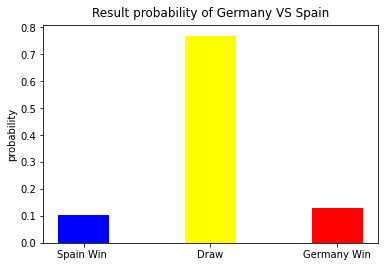

In [100]:
# view the predicting probability of the match SPAIN  vs GERMANY
A = Result_df.loc[Result_df['Home Team'] == 'Spain']
A = A.loc[A['Away Team'] == 'Germany']

data = { 'Spain Win ' : A['Home Win rate'].values[0] ,  'Draw':A['Draw rate'].values[0], 'Germany Win':A['Home Lose rate'].values[0]}

number = list(data.keys())
values = list(data.values())
c = ['blue', 'yellow', 'red']

plt.bar(number, values, color = c, width = 0.4)
plt.title("Result probability of Germany VS Spain", y=1.012)
plt.ylabel("probability", labelpad=3)

plt.show()